In [13]:
!pip3 install torch torchvision torchaudio
!git clone https://github.com/ultralytics/yolov5
!pip install -r yolov5/requirements.txt

import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [14]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Aditya/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-1-25 Python-3.9.13 torch-1.8.1+cu111 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


image 1/1: 315x474 34 cars, 2 trucks
Speed: 579.5ms pre-process, 353.6ms inference, 13.6ms NMS per image at shape (1, 3, 448, 640)


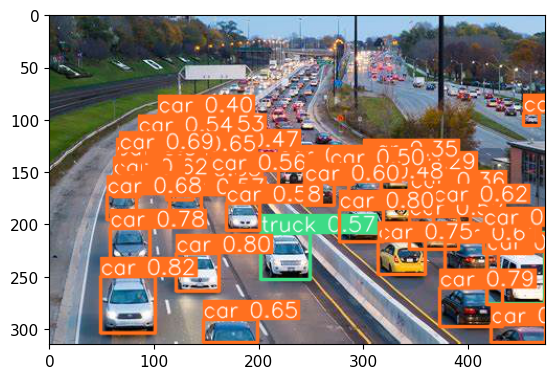

[array([[[ 52,  66,  69],
         [ 51,  64,  70],
         [ 55,  68,  76],
         ...,
         [167, 210, 244],
         [172, 215, 249],
         [172, 215, 249]],
 
        [[ 50,  64,  67],
         [ 49,  63,  66],
         [ 52,  65,  71],
         ...,
         [166, 209, 243],
         [171, 214, 248],
         [171, 214, 248]],
 
        [[ 50,  61,  63],
         [ 49,  60,  64],
         [ 51,  62,  68],
         ...,
         [164, 207, 241],
         [169, 212, 246],
         [169, 212, 246]],
 
        ...,
 
        [[132, 144, 160],
         [134, 146, 160],
         [115, 124, 139],
         ...,
         [255, 112,  31],
         [255, 112,  31],
         [255, 112,  31]],
 
        [[134, 146, 160],
         [137, 149, 163],
         [118, 128, 140],
         ...,
         [255, 112,  31],
         [255, 112,  31],
         [255, 112,  31]],
 
        [[136, 148, 162],
         [141, 153, 167],
         [122, 132, 144],
         ...,
         [255, 112,  31],
  

In [15]:
img = 'https://tse2.mm.bing.net/th?id=OIP.NZg4jCxAJMJTrEZN-SybsQHaE7&pid=Api&P=0'
results = model(img)
results.print()
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()
results.render()

In [16]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [17]:
import uuid   # Unique identifier
import os
import time

In [18]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 5

In [16]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [19]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [20]:
!pip install pyqt5 lxml --upgrade


  Using cached PyQt5-5.15.7-cp37-abi3-win_amd64.whl (6.8 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
spyder 5.2.2 requires pyqt5<5.13, but you have pyqt5 5.15.7 which is incompatible.


In [22]:
!pip3 install PyQt5

In [23]:
!pyrcc5 -o labelImg/libs/resources.py labelImg/resources.qrc

In [32]:
!python yolov5/train.py --img 320 --batch 2 --epoch 500 --data yolov5/dataset.yml --weights yolov5s.pt --worker 1

Traceback (most recent call last):
  File "C:\Users\Aditya\MLProject\yolov5\train.py", line 29, in <module>
    import torch
  File "C:\Users\Aditya\anaconda3\lib\site-packages\torch\__init__.py", line 123, in <module>
    raise err
OSError: [WinError 1455] The paging file is too small for this operation to complete. Error loading "C:\Users\Aditya\anaconda3\lib\site-packages\torch\lib\cusolverMg64_11.dll" or one of its dependencies.
